In [96]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer
nltk.download("punkt")
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [97]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
train_data.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


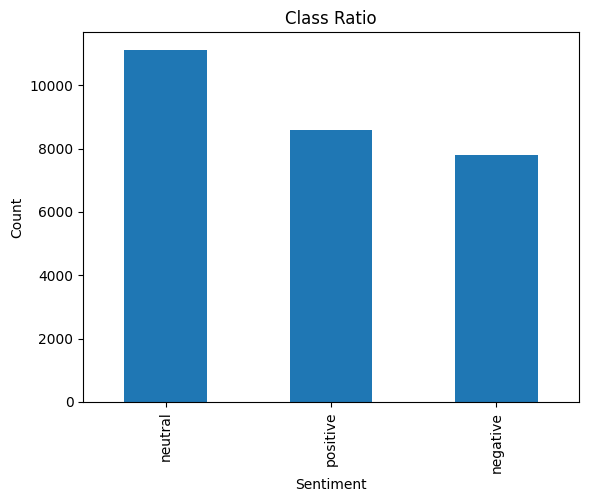

In [98]:
class_counts = train_data['sentiment'].value_counts()

# Plot bar chart of class counts
class_counts.plot(kind='bar')
plt.title("Class Ratio")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [99]:
# Check for NaN values
train_data.isnull().any().sum()

2

In [100]:
train_data.dropna(axis=0, inplace=True)

In [101]:
def preprocess_text(text):

    # Remove URLs and HTML tags
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'<[^>]+>', '', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove punctuation and convert to lowercase
    table = str.maketrans('', '', string.punctuation)
    tokens = [word.translate(table).lower() for word in tokens]

     # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if not word in stop_words]

    # Stem the tokens
    stemmer = SnowballStemmer("english")
    tokens = [stemmer.stem(word) for word in tokens]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Rejoin the cleaned tokens into a string
    cleaned_text = ' '.join(tokens)

    return cleaned_text

train_data['text'] = train_data['text'].apply(preprocess_text)
train_data.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,respond go,"I`d have responded, if I were going",neutral
1,549e992a42,sooo sad miss san diego,Sooo SAD,negative
2,088c60f138,bos bulli,bullying me,negative
3,9642c003ef,interview leav alon,leave me alone,negative
4,358bd9e861,son put releas alreadi bought,"Sons of ****,",negative


In [102]:
# Vectorize data
from sklearn.feature_extraction.text import TfidfVectorizer

# Default params with max_features = 2500
tfidf1 = TfidfVectorizer( max_features = 2500 )
X = tfidf1.fit_transform(train_data['text'])
y = train_data['sentiment']

In [103]:
# Split data
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Build model
from sklearn.svm import SVC

svc = SVC(kernel='linear', C=0.2)
svc.fit(X_train, y_train)

SVC(C=0.2, kernel='linear')

In [104]:
# Evaluate model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_pred_train = svc.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)

y_pred_valid = svc.predict(X_valid)
valid_accuracy = accuracy_score(y_valid, y_pred_valid)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", valid_accuracy)

Training Accuracy: 0.7026928675400291
Validation Accuracy: 0.6752183406113537


In [105]:
accuracy = valid_accuracy
precision = precision_score(y_valid, y_pred_valid, average='macro')
recall = recall_score(y_valid, y_pred_valid, average='macro')
f1 = f1_score(y_valid, y_pred_valid, average='macro')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

target_names = ['Negative', 'Neutral', 'Positive']
print(classification_report(y_valid, y_pred_valid, target_names=target_names))

Accuracy: 0.68
Precision: 0.72
Recall: 0.65
F1 score: 0.67
              precision    recall  f1-score   support

    Negative       0.77      0.46      0.58      1572
     Neutral       0.59      0.83      0.69      2236
    Positive       0.80      0.67      0.73      1688

    accuracy                           0.68      5496
   macro avg       0.72      0.65      0.67      5496
weighted avg       0.71      0.68      0.67      5496



In [106]:
# Using Logistic Regressor
from sklearn.linear_model import LogisticRegression

lrg = LogisticRegression(max_iter=1000)
lrg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [107]:
# Evaluate model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_pred_train = lrg.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)

y_pred_valid = lrg.predict(X_valid)
valid_accuracy = accuracy_score(y_valid, y_pred_valid)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", valid_accuracy)

Training Accuracy: 0.7613264192139738
Validation Accuracy: 0.6846797671033479


In [108]:
y_pred_valid

array(['positive', 'neutral', 'neutral', ..., 'neutral', 'neutral',
       'neutral'], dtype=object)

In [109]:

accuracy = valid_accuracy
precision = precision_score(y_valid, y_pred_valid, average='macro')
recall = recall_score(y_valid, y_pred_valid, average='macro')
f1 = f1_score(y_valid, y_pred_valid, average='macro')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

target_names = ['Negative', 'Neutral', 'Positive']
print(classification_report(y_valid, y_pred_valid, target_names=target_names))

Accuracy: 0.68
Precision: 0.70
Recall: 0.67
F1 score: 0.68
              precision    recall  f1-score   support

    Negative       0.71      0.57      0.63      1572
     Neutral       0.63      0.75      0.68      2236
    Positive       0.77      0.70      0.73      1688

    accuracy                           0.68      5496
   macro avg       0.70      0.67      0.68      5496
weighted avg       0.69      0.68      0.68      5496



In [111]:
# import pandas as pd

# # Assuming you have the test set IDs in a variable named test_ids
# # and the predicted selected text for each ID in a variable named y_pred

# submissions = pd.DataFrame({'textID': test_ids, 'selected_text': y_pred})

# # Add double quotes to the selected text
# submissions['selected_text'] = '"' + submissions['selected_text'] + '"'

# # Save the DataFrame to a CSV file
# submissions.to_csv('submissions.csv', index=False)


In [114]:
selected_texts = []

for idx, row in test_data.iterrows():
    text_id = row['textID']
    tweet_text = row['text']

    preprocessed_text = preprocess_text(tweet_text)

    X = tfidf1.transform([preprocessed_text])

    sentiment = svc.predict(X)

    selected_text = tweet_text

    selected_texts.append(selected_text)

# Create a DataFrame with the text ID and selected text predictions
submissions = pd.DataFrame({'textID': test_data['textID'], 'selected_text': selected_texts})

# Add double quotes to the selected text
submissions['selected_text'] = '"' + submissions['selected_text'] + '"'

# Save the DataFrame to a CSV file
submissions.to_csv('submissions.csv', index=False)